# 寻找最优参数

In [1]:
from sklearn import svm
from sklearn import metrics

import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

# 加载示例数据3

In [2]:
raw_data = sio.loadmat('data/ex6data3.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

In [3]:
raw_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [4]:
train_data = pd.DataFrame(raw_data['X'],columns=['x1','x2'])
train_data['y'] = raw_data['y']

cv = pd.DataFrame(raw_data['Xval'],columns=['x1','x2'])
cv['y'] = raw_data['yval']
train_data.head()

,x1,x2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [5]:
cv.head()

,x1,x2,y
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0


# 可视化训练数据集

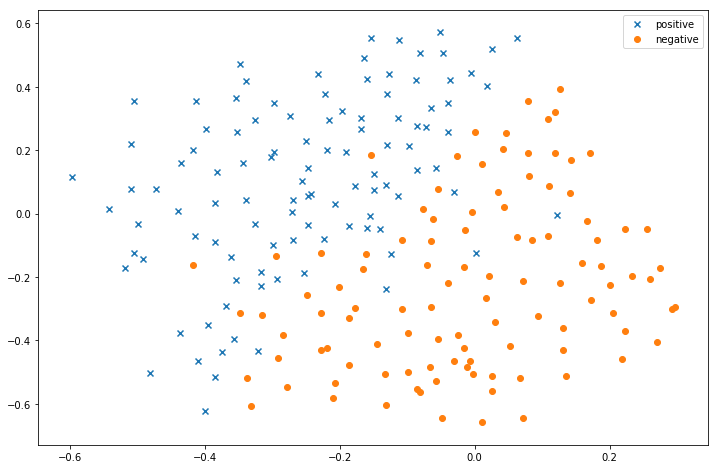

In [6]:
positive = train_data[train_data['y'].isin([1])]
negative = train_data[train_data['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['x1'],positive['x2'],marker='x',label='positive')
ax.scatter(negative['x1'],negative['x2'],marker='o',label='negative')
plt.legend()
plt.show()

可以看到有许多异常点

In [7]:
svc = svm.SVC(C=100,gamma=10,probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
svc.fit(train_data[['x1','x2']],train_data['y'])
svc.score(train_data[['x1','x2']],train_data['y'])

0.9383886255924171

In [9]:
svc1 = svm.SVC(C=1,gamma=10,probability=True)
svc1

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
svc1.fit(train_data[['x1','x2']],train_data['y'])
svc1.score(train_data[['x1','x2']],train_data['y'])

0.933649289099526

可以看到gamma不变，增大C的值，精度有提高

## 寻找最优C和gamm

In [11]:
C_candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

max_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_candidate:
    for gamma in gamma_candidate:
        svc = svm.SVC(C=C,gamma=gamma,probability=True)
        svc.fit(train_data[['x1','x2']],train_data['y'])
        score = svc.score(cv[['x1','x2']],cv['y'])
        
        if score > max_score:
            max_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
max_score,best_params

(0.965, {'C': 0.3, 'gamma': 100})

我们也可以使用scikit-learn的内置网格搜索来做到这一点

In [23]:
from sklearn.grid_search import GridSearchCV
candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

parameters = {'C': candidate, 'gamma': candidate}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1)
clf.fit(train_data[['x1', 'x2']], train_data['y'])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [24]:
clf.best_params_

{'C': 10, 'gamma': 30}

In [26]:
clf.best_score_

0.9004739336492891

结果为什么不一样？  
>有种解释是网格搜索使用了部分训练集进行训练，另一部分作为cv进行验证
所以没有用到我们使用的cv数据  在2个不同的数据集上验证的结果自然不一样